In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt 

In [11]:
# load image

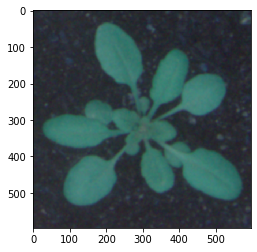

In [12]:
# path_image = '../data/farmbot/image2.png'
path_image = '../data/farmbot/image6.png'


# RGB format
image = cv2.imread(path_image, cv2.IMREAD_COLOR)
plt.imshow(image)


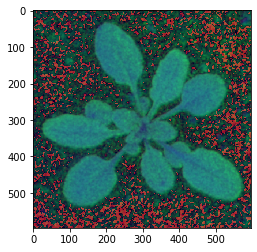

In [13]:
# Convert BGR to HSV
img_flt = cv2.GaussianBlur(image, (3, 3), 0)
hsv = cv2.cvtColor(img_flt, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)


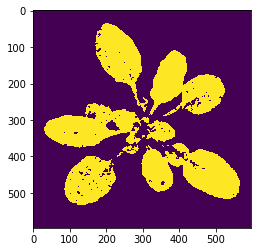

In [14]:
# TODO why

# define range of blue color in HSV
lower_blue = np.array([30,110,100])
upper_blue = np.array([120,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)
plt.imshow(mask)


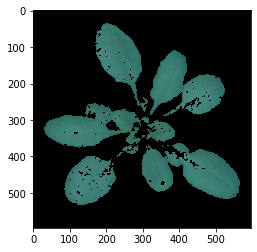

In [15]:
# Bitwise-AND mask and original image
res = cv2.bitwise_and(image,image, mask= mask)
plt.imshow(res)

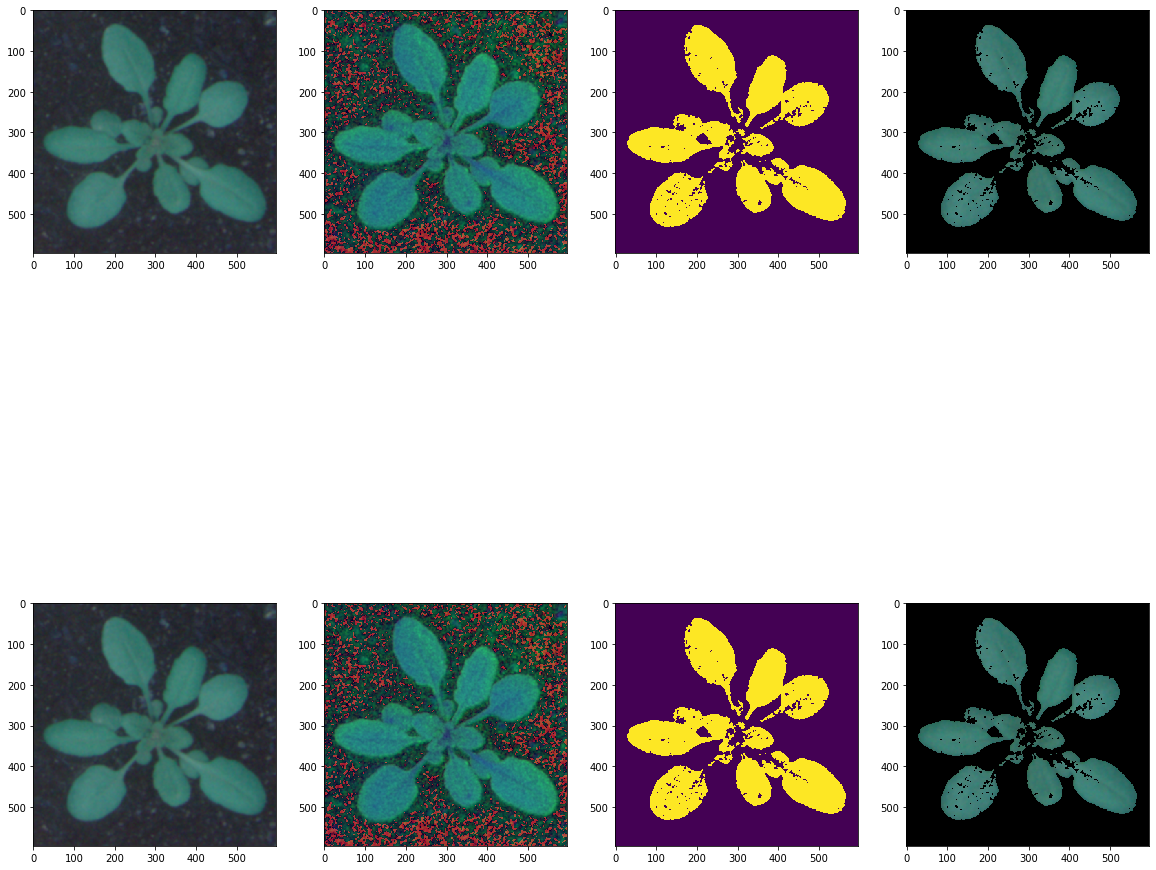

In [16]:

# RGB format
image = cv2.imread(path_image, cv2.IMREAD_COLOR)

# Hsv format
img_flt = cv2.GaussianBlur(image, (3, 3), 0)
hsv = cv2.cvtColor(img_flt, cv2.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([30,110,100])
upper_blue = np.array([120,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(image,image, mask= mask)

fig, axs = plt.subplots(2, 4, figsize=(20, 20))
axs[0][0].imshow(image)
axs[0][1].imshow(hsv)
axs[0][2].imshow(mask)
axs[0][3].imshow(res)

axs[1][0].imshow(image)
axs[1][1].imshow(hsv)
axs[1][2].imshow(mask)
axs[1][3].imshow(res)

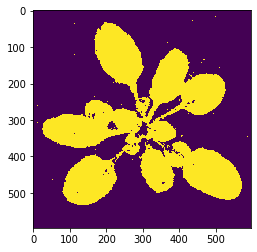

In [17]:
sensitivity = 35
lower_hsv = np.array([60 - sensitivity, 100, 50])
upper_hsv = np.array([60 + sensitivity, 255, 255])

img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(img_hsv, lower_hsv, upper_hsv)
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
# mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
plt.imshow(mask)


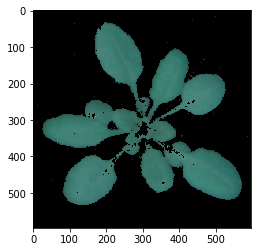

In [18]:
# Bitwise-AND mask and original image
res = cv2.bitwise_and(image,image, mask= mask)
plt.imshow(res)

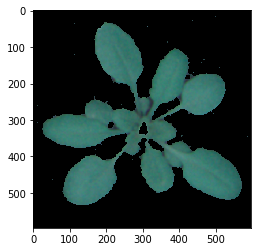

In [61]:
plt.imshow(image_bgr)
plt.savefig('../data/farmbot/demo-org.png')

plt.imshow(hsv)
plt.savefig('../data/farmbot/demo-hsv.png')

plt.imshow(image_mask)
plt.savefig('../data/farmbot/demo-mask.png')

plt.imshow(image_sharpen)
plt.savefig('../data/farmbot/demo-shp.png')

In [23]:
# image_path = '../data/farmbot/image2.png'
image_path = '../data/farmbot/image6.png'

(-0.5, 595.5, 595.5, -0.5)

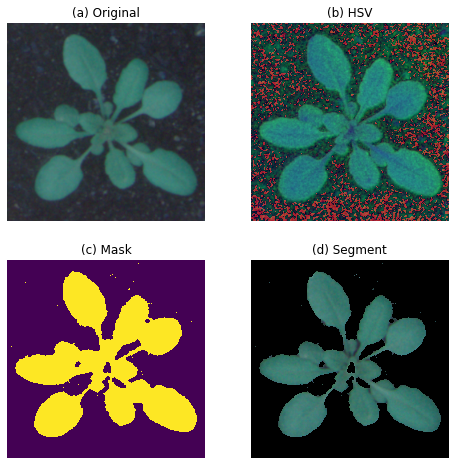

In [60]:
image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
image_mask = create_mask_for_plant(image_bgr)
image_segmented = segment_plant(image_bgr)
image_sharpen = sharpen_image(image_segmented)

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0][0].imshow(image_bgr)
axs[0][0].title.set_text('(a) Original')
axs[0][0].axis('off')

axs[0][1].imshow(hsv)
axs[0][1].title.set_text('(b) HSV')
axs[0][1].axis('off')
# axs[1][0].imshow(image_segmented)

axs[1][0].imshow(image_mask)
axs[1][0].title.set_text('(c) Mask')
axs[1][0].axis('off')

axs[1][1].imshow(image_sharpen)
axs[1][1].title.set_text('(d) Segment')
axs[1][1].axis('off')

In [21]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

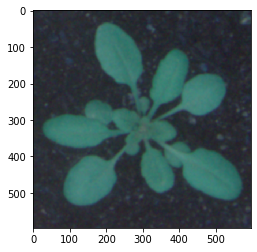

In [3]:
# path_image = '../data/farmbot/image2.png'
path_image = '../data/farmbot/image6.png'


# RGB format
image = cv2.imread(path_image, cv2.IMREAD_COLOR)
plt.imshow(image)
img_original = image

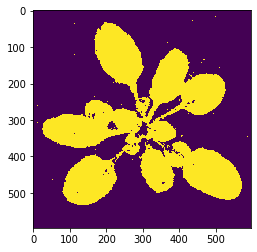

In [5]:
# create_mask_for_plant

# BGR to HSV
img_hsv = cv2.cvtColor(img_original, cv2.COLOR_BGR2HSV) 

# HSV sensitivity range
hsv_lower_bound = np.array([25, 100, 50])
hsv_upper_bound = np.array([95, 255, 255])

img_mask = cv2.inRange(img_hsv, hsv_lower_bound, hsv_upper_bound)
plt.imshow(img_mask)

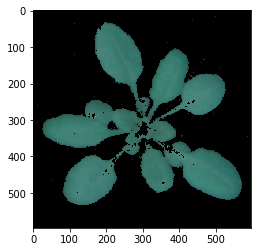

In [6]:
# segment
img_segment = cv2.bitwise_and(img_original, img_original, mask = img_mask)
plt.imshow(img_segment)

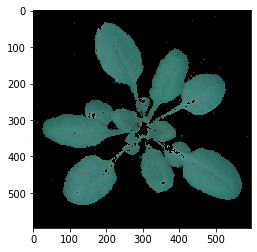

In [8]:
# sharp
image_sharp = cv2.addWeighted(img_segment, 1.5, cv2.GaussianBlur(img_segment, (0, 0), 3), -0.5, 0)
plt.imshow(image_sharp)

In [54]:
history = {}
history['acc'] = [0.7203,0.8758,0.9014,0.9098,0.9254,0.9299,0.9390,0.9440,0.9474,0.9537]
history['loss'] = [0.8916,0.3944,0.3116,0.2724,0.2236,0.2133,0.2002,0.1774,0.1678,0.1453]

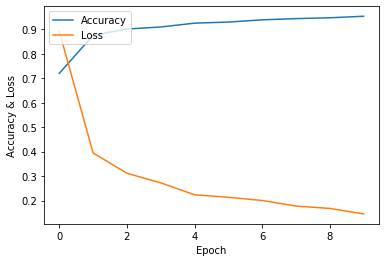

In [58]:
plt.plot(history['acc'])
plt.plot(history['loss'])
plt.ylabel('Accuracy & Loss')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()